### Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста

Цель: приоритезировать гипотезы, произвести оценку результатов A/B тестирования продукта.


### Вывод

1. Как по "сырым", так и по "очищенным" от аномалий данным существуют статистически значимые различия по конверсии между группами. Конверсия по группе В выше конверсии по группе А.

2. Нет статистически значимого различия по среднему чеку между группами ни по "сырым", ни по "очищенным" от аномалий данным. 

3. График конверсий по группам показывает, что результаты группы В лучше группы А и, вероятнее всего, стабилизировались и зафиксировались около среднего значения.

4. График различия среднего чека по "сырым" данным не позволяет сделать выводы из-за ряда заказов на крупную сумму. Однако, после "очистки" данных от аномалий, мы видим, что разница составляет 2,3% и не является статистически значимой.

5. Завершаем проведение А/В теста, фиксируем победу группы В по конверсии и отсутствие значимых различий по среднему чеку.


### Ключевые понятия

A/B тестирование, Pandas, Python, Matplotlib, SciPy, проверка статистических гипотез


### Описание данных

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


[Приоритизация гипотез](#step1)

- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

[Анализ А/В теста](#step2)

[Примем решение по результатам теста и объясниим его](#step3)

### Приоритизация гипотез <a id="step1"></a>   

In [1]:
# импортируем библиотеки, которые потребуются нам для работы
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# для того, чтобы прочесть гипотезу полностью увеличим допустимое количество символов в строке до 100
pd.options.display.max_colwidth = 100

In [3]:
hypothesis = pd.read_csv('/home/ilya/Desktop/Datasets/AB test/hypothesis.csv')
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета. 

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [4]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Самыми перспективными оказались гипотезы с индексами 8, 0, 7 и 6. Очень важно правильно определить самую перспективную гипотезу, так как это позволит исключить нерациональные затраты сэкономить трудовых ресурсов на проверку менее значимых гипотез. Применим фреймворк RICE и посмотрим как они распределятся.

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [5]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Ситуация несколько изменилась. Мы потеряли из топа гипотезу 8 и на первое место вышла гипотеза с индексом 7. Также в топ-4 вошла гипотеза с индексом 2. Сейчас самыми перспективными гипотезами являются 7, 2, 0, 6. Это произошло потому что у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" параметр Reach равен 10. Это значет, что изменения затронут всех пользователей нашего интернет магазина. Тогда как скидка в день рождения только 10% клиентов.

### Анализ А/В теста <a id="step2"></a>   

In [6]:
orders = pd.read_csv('/home/ilya/Desktop/Datasets/AB test/orders.csv')
orders.tail(10)

,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


Есть заказы больше чем на 200 000 - это явные выбросы. С ними отработаем чуть позже.

In [7]:
visitors = pd.read_csv('/home/ilya/Desktop/Datasets/AB test/visitors.csv')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [10]:
# соберём агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [11]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
                                       axis=1).sort_values(by=['date','group'])

In [12]:
# объединим кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


In [13]:
# построим график кумулятивной выручки по дням и группам A/B-тестирования
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

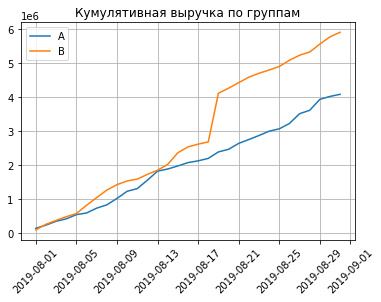

In [15]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');
plt.xticks(rotation=45);
plt.grid()
plt.legend();
plt.title('Кумулятивная выручка по группам');

Выручка почти равномерно увеличивается в течение всего теста. Это хорошо. Тем не менее, графики выручки обеих групп в нескольких точках резко растут. Особенно это ярко выражено в группе В. Скорее всего это указывает на то, что есть всплеск числа заказов, либо на появление очень дорогих заказов в выборке. 
Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

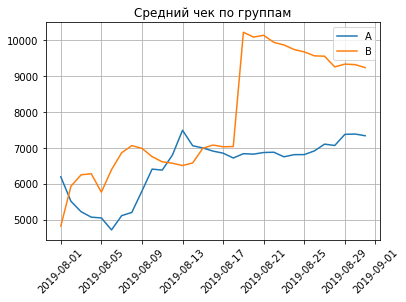

In [16]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B');
plt.xticks(rotation=45);
plt.grid()
plt.legend();
plt.title('Средний чек по группам');

Средний чек во второй половине теста становится более равномерным: постепенно растёт для группы A и продолжает падать для группы B. Возможно, в группу B в первой половине теста попали крупные заказы (резкие всплески на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.
Построим график относительного различия для среднего чека.

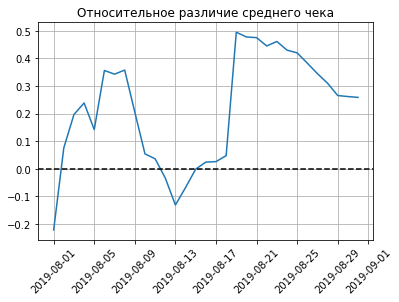

In [17]:
# собирем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');
plt.xticks(rotation=45);
plt.grid()
plt.title('Относительное различие среднего чека');

В середине графика виден огромный "провал". Очевидно, что имеются крупные заказы и выбросы.
Аналогично проанализируем график кумулятивной конверсии. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-08-01", '2019-09-01', 0, 0.5]

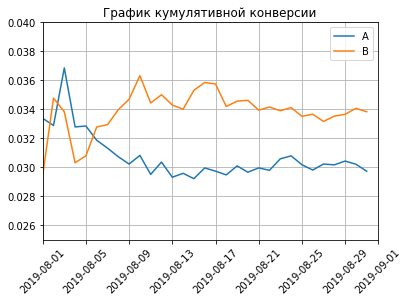

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A');
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B');
plt.legend();

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0.025, 0.04]);
plt.xticks(rotation=45);
plt.grid()
plt.title('График кумулятивной конверсии');

В первые несколько дней сначала лидировала одна группа, затем другая. Затем установилась чёткая тенденция: группа В показывала стабильно большую конверсию, нежели группа А. Построим график относительного различия кумулятивных конверсий.

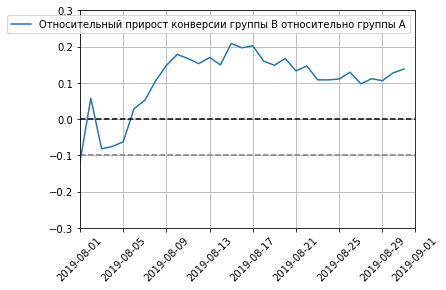

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A");
plt.legend();

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=-0.1, color='grey', linestyle='--');
plt.xticks(rotation=45);
plt.grid()
plt.axis(['2019-08-01', '2019-09-01', -0.3, 0.3]);

В начале теста непродолжительное время группа B проигрывала группе A, затем вырвалась вперёд. Её конверсия колебалась, но всё время была выше конверсии группы А.
В целом отношение конверсии колеблется на уровне от 10 до 20%. Сперва стоит проанализировать аномалии, возможно, они изменят картину.

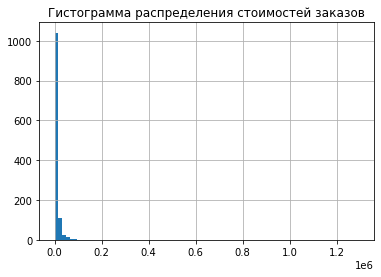

In [20]:
# изучим гистограмму распределения стоимостей заказов:
plt.hist(orders['revenue'], bins=80);
plt.grid()
plt.title('Гистограмма распределения стоимостей заказов');

В данных явно есть заказы дороже 20 000 — например, около 40 000, 60 000 и 100 000 рублей. Однако большинство всё-таки имеет меньшую выручку.
Чтобы более наглядно увидеть выбросы, оценим стоимость заказов с помощью точечного графика.

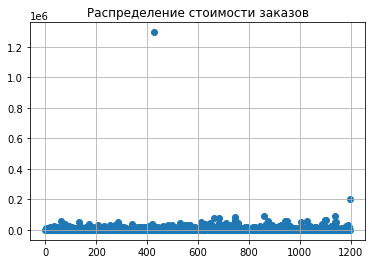

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])));
plt.scatter(x_values, orders['revenue']);
plt.grid()
plt.title('Распределение стоимости заказов');

Есть немного дорогих заказов в районе 100 000, 200 000 и даже 1 200 000. По графику сложно выбрать границу аномальных заказов из-за очень большого выброса в районе 1 200 000. Принято отсеивать от 1% до 5% наблюдений с крайними значениями.

In [22]:
# Определим 90, 95 и 99 перцентили среднего чека в выборке
display(np.percentile(orders['revenue'], [90, 95, 99]))

array([18168. , 28000. , 58233.2])

Не более 5% заказов дороже 28 000 и не более 1% дороже 58 233,2.

Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. Скорее всего, их поведение отличается от нормального. Как правило, среднестатистический пользователь совершает не больше двух заказов за короткий срок.
Подсчитаем количество заказов по пользователям и посмотрим на результат.

In [23]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], 
                            axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали 5, 8, 9 и даже 11 заказов. Значительно больше, чем обычный пользователь. Построим гистрограмму распределения количества заказов на одного пользователя.

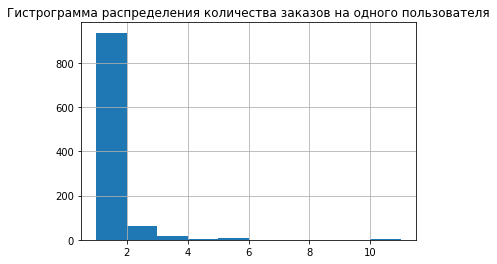

In [24]:
plt.hist(ordersByUsers['orders']);
plt.grid()
plt.title('Гистрограмма распределения количества заказов на одного пользователя');

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна.
Построим точечную диаграмму числа заказов на одного пользователя.

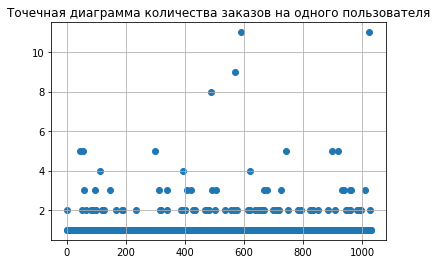

In [25]:
x_values = pd.Series(range(0,len(ordersByUsers)));
plt.scatter(x_values, ordersByUsers['orders']);
plt.grid()
plt.title('Точечная диаграмма количества заказов на одного пользователя');

Выводы подтверждаются: много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.
Посчитаем выборочные перцентили количества заказов на одного пользователя.

In [26]:
display(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

array([1., 2., 4.])

Не более 5% пользователей оформляли больше чем 2-х заказов и только 1% более 4-х. И 10% пользователей заказывали более одного раза. Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Начнём с подготовки данных.

In [27]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] 
                                                                     <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [28]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] 
                                                                     <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [29]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [30]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [31]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(10)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


Посчитаем статистическую значимость различия в конверсии между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [32]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [33]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [34]:
# объединим последовательности функцией pd.concat()
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                                       .sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [35]:
# Передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                                                           .sum() - len(ordersByUsersA['orders'])), 
                                                        name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                                                                           .sum() - len(ordersByUsersB['orders'])), 
                                                        name='orders')],axis=0)

In [36]:
# Выведем относительный прирост конверсии группы B. Округлим до трёх знаков после запятой.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [37]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                                                           .sum() - len(ordersByUsersA['orders'])), 
                                                        name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                                                                           .sum() - len(ordersByUsersB['orders'])), 
                                                        name='orders')],axis=0)

print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Oтносительный прирост конверсии группы В к группе А =', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value = 0.008
Oтносительный прирост конверсии группы В к группе А = 0.138


Вывод: По «сырым» данным **различия в конверсии групп A и B имеются**.
Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не подтверждаем. Более того, конверсия в группе B выше на 13.8%.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами:

In [38]:
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                       orders[orders['group']=='B']['revenue'])[1]))
print('Oтносительный прирост среднего чека группы В к группе А =', "{0:.3f}"\
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.365
Oтносительный прирост среднего чека группы В к группе А = 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Делаем вывод, что **различий в среднем чеке между группами А и В нет**. Однако, стоит обратить внимание, что средний чек группы B значительно выше среднего чека группы A - почти на 26%. Возможно, это связано с очень дорогими заказами.

Примем за аномальных пользователей тех, кто совершил более 2-х заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2-х — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape().

In [39]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)\
.drop_duplicates().sort_values()
display(abnormalUsers.head(10))
abnormalUsers.shape

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
684     358944393
648     382846391
1189    393266494
68      457167155
68      611059232
Name: visitorId, dtype: int64

(68,)

Всего 68 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [40]:
sampleAFiltered = pd.concat([ordersByUsersA[np\
                                            .logical_not(ordersByUsersA['visitorId']\
                                                         .isin(abnormalUsers))]['orders'],pd\
                             .Series(0, index=np.arange(data['visitorsPerDateA']\
                                                       .sum() - len(ordersByUsersA['orders'])),name='orders')], 
                            axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']\
                                                           .isin(abnormalUsers))]['orders'],pd\
                             .Series(0, index=np.arange(data['visitorsPerDateB']\
                                                        .sum() - len(ordersByUsersB['orders'])),name='orders')],
                            axis=0)

In [41]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Oтносительный прирост конверсии группы В к группе А =', 
      "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.007
Oтносительный прирост конверсии группы В к группе А = 0.172


Результаты по конверсии практически не изменились. p-value снизился с 0.008 до 0.007. Конверсия в группе B возросла с 13,8% до 17,2%. **Учитывая показатель p-value можно сказать о том, что различия в конверсии между группами А и В имеются**.

Посмотрим произошло ли что-нибудь с результатами по среднему чеку.

In [42]:
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Oтносительный прирост среднего чека группы В к группе А =', "{0:.3f}".format(
    orders[np.logical_and(
        orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value = 0.360
Oтносительный прирост среднего чека группы В к группе А = -0.023


P-value незначительно уменьшился, однако он существенно больше 0,05. **Учитывая показатель p-value различий в среднем чеке между группами А и В нет**. Разница между средними чеками групп изменилась. Если в "сырых данных" средний чек группы В был выше среднего чека группы А почти на 26%, то по очищенным данным средний чек группы В ниже группы А на 2,3%.
Таким образом, выбросы оказали колосальное влияние на средний чек группы. Вспомним, что у нас был ряд крупных заказов, в том числе и выше 1,2 млн. Они и сыграли свою роль.

### Решение по результатам теста <a id="step3"></a>   

Задачей было проанализовать результаты А/В теста и принять решение на основании полученных результатов. После изучения основных показателей групп А и В за период проведения теста можно сделать следующие выводы:

1. Как по "сырым", так и по "очищенным" от аномалий данным существуют статистически значимые различия по конверсии между группами. Относительная разница по этой метрике составила 13,8% по "сырым" данным и 17,2% по "очищенным". Конверсия по группе В действительно выше конверсии по группе А, даже после очистки данных.

2. Нет статистически значимого различия по среднему чеку между группами ни по "сырым", ни по "очищенным" от аномалий данным. При этом по "сырым" данным относительная разница между средним чеком составляла 26%, но не была статически значимой, так так эта разница явилась результатом выбросов. По "очищенным" от аномалий данным относительная разница составляет 2,3% и не является статистически значимой.

3. График конверсий по группам показывает, что результаты группы В лучше группы А и, вероятнее всего, стабилизировались и зафиксировались около среднего значения.

4. График различия среднего чека по "сырым" данным не позволяет сделать выводы из-за ряда заказов на крупную сумму. Однако, после "очистки" данных от аномалий, мы видим, что разница составляет 2,3% и не является статистически значимой.

Исходя из перечисленных фактов целесообразно завершить проведение данного А/В теста, зафиксировать победу группы В по конверсии и отсутствие значимых различий по среднему чеку.